폴더 만들기 , 삭제하기 ,for문과 동적변수를 이용해서 파일 복사하기 코드가 포함되어 있습니다.

# 최종 모델
# 

In [32]:
import os, shutil
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score
from keras import models
from keras import layers
from keras import optimizers

In [33]:
ddokbbokkiList=list()
doenjangList = list()
eggList = list()
friedchickenList = list()
galbiList = list()
galbitangList =list()
galchiList = list()
gimbabList = list()
gimchiList = list()
gimchijjigeList = list()
hangwaList = list()
hemulzimList = list()
jajangmyunList = list()
jjimdakList = list()
joekbalList = list()
kkaesipList = list()
kkomakList = list()
kongjabanList = list()
mandooList = list()
mulhoeList = list()
pizzaList = list()
potatoList = list()
samgyetangList = list()
seootwoigimList = list()
sikhyeList = list()
soondeList = list()
sosegibokkumList = list()
sujungguaList = list()
yakgyaList = list()
yukhoeList = list()
imgList= list()
for _ in range(300):
    ddokbbokkiList.append(cv.imread('data/food_img/ddokbbokki/ddokbbokki ('+str(_)+').jpg'))
    doenjangList.append(cv.imread('data/food_img/doenjang/doenjang ('+str(_)+').jpg'))
    eggList.append(cv.imread('data/food_img/egg/egg ('+str(_)+').jpg'))
    friedchickenList.append(cv.imread('data/food_img/friedchicken/friedchicken ('+str(_)+').jpg'))
    galbiList.append(cv.imread('data/food_img/galbi/galbi ('+str(_)+').jpg'))
    
    galbitangList.append(cv.imread('data/food_img/galbitang/galbitang ('+str(_)+').jpg'))
    galchiList.append(cv.imread('data/food_img/galchi/galchi ('+str(_)+').jpg'))
    gimbabList.append(cv.imread('data/food_img/gimbab/gimbab ('+str(_)+').jpg'))
    gimchiList.append(cv.imread('data/food_img/gimchi/gimchi ('+str(_)+').jpg'))
    gimchijjigeList.append(cv.imread('data/food_img/gimchijjige/gimchijjige ('+str(_)+').jpg'))
    
    hangwaList.append(cv.imread('data/food_img/hangwa/hangwa ('+str(_)+').jpg'))
    hemulzimList.append(cv.imread('data/food_img/hemulzim/hemulzim ('+str(_)+').jpg'))
    jajangmyunList.append(cv.imread('data/food_img/jajangmyun/jajangmyun ('+str(_)+').jpg'))
    jjimdakList.append(cv.imread('data/food_img/jjimdak/jjimdak ('+str(_)+').jpg'))
    joekbalList.append(cv.imread('data/food_img/joekbal/joekbal ('+str(_)+').jpg'))
    
    kkaesipList.append(cv.imread('data/food_img/kkaesip/kkaesip ('+str(_)+').jpg'))
    kkomakList.append(cv.imread('data/food_img/kkomak/kkomak ('+str(_)+').jpg'))
    kongjabanList.append(cv.imread('data/food_img/kongjaban/kongjaban ('+str(_)+').jpg'))
    mandooList.append(cv.imread('data/food_img/mandoo/mandoo ('+str(_)+').jpg'))
    mulhoeList.append(cv.imread('data/food_img/mulhoe/mulhoe ('+str(_)+').jpg'))
    
    pizzaList.append(cv.imread('data/food_img/pizza/pizza ('+str(_)+').jpg'))
    potatoList.append(cv.imread('data/food_img/potato/potato ('+str(_)+').jpg'))
    samgyetangList.append(cv.imread('data/food_img/samgyetang/samgyetang ('+str(_)+').jpg'))
    seootwoigimList.append(cv.imread('data/food_img/seootwoigim/seootwoigim('+str(_)+').jpg'))
    sikhyeList.append(cv.imread('data/food_img/sikhye/sikhye ('+str(_)+').jpg'))
    
    soondeList.append(cv.imread('data/food_img/soonde/soonde ('+str(_)+').jpg'))
    sosegibokkumList.append(cv.imread('data/food_img/sosegibokkum/sosegibokkum ('+str(_)+').jpg'))
    sujungguaList.append(cv.imread('data/food_img/sujunggua/sujunggua ('+str(_)+').jpg'))
    yakgyaList.append(cv.imread('data/food_img/yakgya/yakgya ('+str(_)+').jpg'))
    yukhoeList.append(cv.imread('data/food_img/yukhoe/yukhoe ('+str(_)+').jpg'))
else:
    imgList = (ddokbbokkiList+doenjangList+eggList+friedchickenList+galbiList+\
               galbitangList+galchiList+gimbabList+gimchiList+gimchijjigeList+\
               hangwaList+hemulzimList+jajangmyunList+jjimdakList+joekbalList+\
               kkaesipList+kkomakList+kongjabanList+mandooList+mulhoeList+\
               pizzaList+potatoList+samgyetangList+seootwoigimList+sikhyeList+\
               soondeList+sosegibokkumList+sujungguaList+yakgyaList+yukhoeList)
    
    
    print('complete data are open')
    

complete data are open


In [50]:
data = np.zeros([9000,150,150,3],dtype=int)
for _ in range(len(imgList)):
    data[_,:,:,:]= imgList[_][:,:,::-1]
    

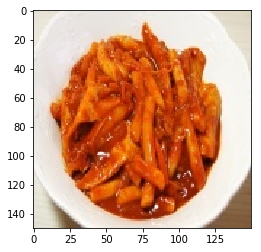

In [51]:
plt.imshow(data[0,...])

In [52]:
#라벨을 벡터화 시키는 방법 1
t=list()
for _ in range(int(data.shape[0]/300)):
    for j in range(300):
        t.append(_)
t=np.array(t)

targets = np.array(pd.get_dummies(t)).astype('int')

In [55]:
targets


array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [83]:
# 모델 선언
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(30, activation='softmax'))


# optimizers.Adam
model.compile(optimizer=optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, 
                                        epsilon=None, decay=1e-6, amsgrad=False),
              loss='categorical_crossentropy',
              metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 34, 34, 128)       147584    
__________

In [84]:
X_train, X_test, y_train, y_test = train_test_split(data,targets)

In [85]:
model.fit(X_train,y_train,batch_size=10,epochs=2,
          validation_data=(X_test,y_test))

Train on 6750 samples, validate on 2250 samples
Epoch 1/2
6750/6750 [==============================] - 21s 3ms/step - loss: 3.4054 - acc: 0.0289 - val_loss: 3.4038 - val_acc: 0.0302
Epoch 2/2
6750/6750 [==============================] - 20s 3ms/step - loss: 3.4040 - acc: 0.0308 - val_loss: 3.4045 - val_acc: 0.0302


In [86]:
# k-fold cross validataion
np.random.seed(42)
np.random.shuffle(data)
np.random.seed(42)
np.random.shuffle(targets)
data = (data/255.).astype('float32')
k = 3
num_val_samples = len(data) // k
num_epochs = 2

all_scores = []

# 3등분
for i in range(k): 
    
    val_data = data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = targets[i * num_val_samples : (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([data[:i * num_val_samples],
                                         data[(i + 1) * num_val_samples:]], axis=0)
    print(partial_train_data.shape)
    partial_train_targets = np.concatenate([targets[:i * num_val_samples],
                                           targets[(i + 1) * num_val_samples:]], axis=0)
    print(partial_train_targets.shape)

    model.fit(partial_train_data, partial_train_targets,
                    epochs=num_epochs,
                    batch_size=64,
                    validation_data=(val_data, val_targets))
#     history = model.fit(partial_train_data, partial_train_targets,
#                    epochs=num_epochs,
#                    batch_size=64,
#                    validation_data=(val_data, val_targets))
    
    val_score = model.evaluate(val_data, val_targets)
                        
    all_scores.append(val_score)


(6000, 150, 150, 3)
(6000, 30)
Train on 6000 samples, validate on 3000 samples
Epoch 1/2
6000/6000 [==============================] - 13s 2ms/step - loss: 3.4024 - acc: 0.0328 - val_loss: 3.4025 - val_acc: 0.0327
Epoch 2/2
3000/3000 [==============================] - 2s 674us/step
(6000, 150, 150, 3)
(6000, 30)
Train on 6000 samples, validate on 3000 samples
Epoch 1/2
6000/6000 [==============================] - 13s 2ms/step - loss: 3.4025 - acc: 0.0317 - val_loss: 3.4011 - val_acc: 0.0317
Epoch 2/2
3000/3000 [==============================] - 2s 681us/step
(6000, 150, 150, 3)
(6000, 30)
Train on 6000 samples, validate on 3000 samples
Epoch 1/2
6000/6000 [==============================] - 13s 2ms/step - loss: 3.4020 - acc: 0.0310 - val_loss: 3.4017 - val_acc: 0.0357
Epoch 2/2
3000/3000 [==============================] - 2s 678us/step


In [15]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './data/num_food_img'

# 소규모 데|이터셋을 저장할 디렉터리
base_dir = './datasets/food_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

In [16]:
# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [17]:
train_dir

'./datasets/food_small\\train'

In [18]:
# 방법 1 
for i in range(30):
    globals()['train_{}_dir'.format(i)] = [os.path.join(train_dir, str(i))]
    os.mkdir(globals()['train_{}_dir'.format(i)][0])
    globals()['validation_{}_dir'.format(i)] = [os.path.join(validation_dir,
                                                         str(i))]
    os.mkdir(globals()['validation_{}_dir'.format(i)][0])
    globals()['test_{}_dir'.format(i)] = [os.path.join(test_dir, str(i))]
    os.mkdir(globals()['test_{}_dir'.format(i)][0])

In [19]:
# 방법2
# 훈련용,검증용,테스트용 음식 사진 디렉터리
for _ in range(30):
    os.mkdir(os.path.join(train_dir, str(_)))
    os.mkdir(os.path.join(validation_dir, str(_)))
    os.mkdir(os.path.join(test_dir, str(_)))

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: './datasets/food_small\\train\\0'

In [23]:
# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다 

for _ in range(30):
    original_dataset_dir_t = os.path.join(original_dataset_dir,str(_)) 
    fnames = ['{}.jpg'.format(i) for i in range(200)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir_t,fname)
        dst = os.path.join(globals()['train_{}_dir'.format(_)][0], fname)
        shutil.copyfile(src, dst)
    fnames = ['{}.jpg'.format(i) for i in range(200,250)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir_t,fname)
        dst = os.path.join(globals()['validation_{}_dir'.format(_)][0], fname)
        shutil.copyfile(src, dst)

    fnames = ['{}.jpg'.format(i) for i in range(250,300)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir_t,fname)
        dst = os.path.join(globals()['test_{}_dir'.format(_)][0], fname)
        shutil.copyfile(src, dst)
    
    

In [93]:
# 모델 선언
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(30, activation='softmax'))


# optimizers.Adam
model.compile(optimizer=optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, 
                                        epsilon=None, decay=1e-6, amsgrad=False),
              loss='categorical_crossentropy',
              metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 34, 34, 128)       147584    
__________

In [101]:
from keras.applications import VGG16
# vgg16은 224x224 사이즈 이미지를 입력으로 받아 학습된 상태인데
# 그보다 작은 사이즈도 된다. 혹시나 잘 안되면 224x224에 맞춰보자.
pre_trained_model = VGG16(weights='imagenet',  # 이미지넷의 데이터로 1000개 클래스 분류에 대해 학습된 가중치
                          include_top=None,   # VGG16에서 5번째 맥스풀링 이후의 과정은 잘라낸다
                          input_shape=(150,150, 3))
model = models.Sequential()
model.add(pre_trained_model)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(30, activation='softmax'))


# optimizers.Adam
model.compile(optimizer=optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, 
                                        epsilon=None, decay=1e-6, amsgrad=False),
              loss='categorical_crossentropy',
              metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_11 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 8192)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_44 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_45 (Dropout)         (None, 256)               0         
__________

# 데이터 증식 사용 하지 않고 훈련

In [102]:
train_datagen = ImageDataGenerator(
    rescale=1./255)
# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
    # 트레이닝 데이터수 / 배치사이즈
      steps_per_epoch=10,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=10)

Found 6000 images belonging to 30 classes.
Found 1500 images belonging to 30 classes.
Epoch 1/50
10/10 [==============================] - 9s 931ms/step - loss: 14.2968 - acc: 0.0400 - val_loss: 15.7957 - val_acc: 0.0200
Epoch 2/50
10/10 [==============================] - 2s 214ms/step - loss: 15.6346 - acc: 0.0300 - val_loss: 15.6346 - val_acc: 0.0300
Epoch 3/50
10/10 [==============================] - 2s 213ms/step - loss: 15.6346 - acc: 0.0300 - val_loss: 15.1510 - val_acc: 0.0600
Epoch 4/50
10/10 [==============================] - 2s 216ms/step - loss: 15.5540 - acc: 0.0350 - val_loss: 14.9898 - val_acc: 0.0700
Epoch 5/50
10/10 [==============================] - 2s 213ms/step - loss: 15.5540 - acc: 0.0350 - val_loss: 15.7957 - val_acc: 0.0200
Epoch 6/50
10/10 [==============================] - 2s 216ms/step - loss: 15.9569 - acc: 0.0100 - val_loss: 15.7957 - val_acc: 0.0200
Epoch 7/50
10/10 [==============================] - 2s 214ms/step - loss: 15.3928 - acc: 0.0450 - val_loss: 15

# 데이터 증식 사용하기

In [104]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
    # 트레이닝 데이터수 / 배치사이즈
      steps_per_epoch=20,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=10)

Found 6000 images belonging to 30 classes.
Found 1500 images belonging to 30 classes.
Epoch 1/100
20/20 [==============================] - 4s 206ms/step - loss: 15.3122 - acc: 0.0500 - val_loss: 15.6346 - val_acc: 0.0300
Epoch 2/100
20/20 [==============================] - 4s 200ms/step - loss: 15.7957 - acc: 0.0200 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 3/100
20/20 [==============================] - 4s 200ms/step - loss: 15.7554 - acc: 0.0225 - val_loss: 15.4734 - val_acc: 0.0400
Epoch 4/100
20/20 [==============================] - 4s 200ms/step - loss: 15.6748 - acc: 0.0275 - val_loss: 15.7957 - val_acc: 0.0200
Epoch 5/100
20/20 [==============================] - 4s 200ms/step - loss: 15.7554 - acc: 0.0225 - val_loss: 15.6346 - val_acc: 0.0300
Epoch 6/100
20/20 [==============================] - 4s 201ms/step - loss: 15.5540 - acc: 0.0350 - val_loss: 15.1510 - val_acc: 0.0600
Epoch 7/100
20/20 [==============================] - 4s 201ms/step - loss: 15.5943 - acc: 0.0325 - val_l

In [105]:
model.save('food_small_2.h5')

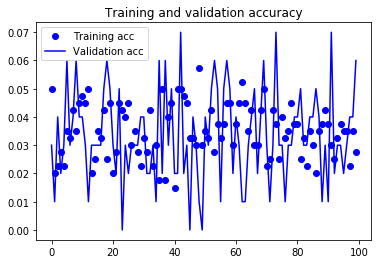

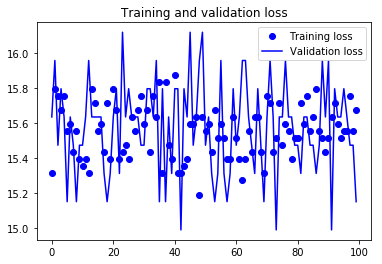

In [106]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 결과
- 학습이 되지 않는 이유에 대해
    - 원본 데이터의 너무 큰 축소화
        - 사이즈 업 해서 해보자
    - VGG16을 써보자
        - 결과 : 안좋다